In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sbn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [2]:
# loading data

df= pd.read_csv('/home/jpozoc/barracuda/jpozoc/Master HMDA/Machine Learning/Trabajo 2/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [5]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.


In [9]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



### There is some ambiguity present in the columns we have to remove that.

In [13]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

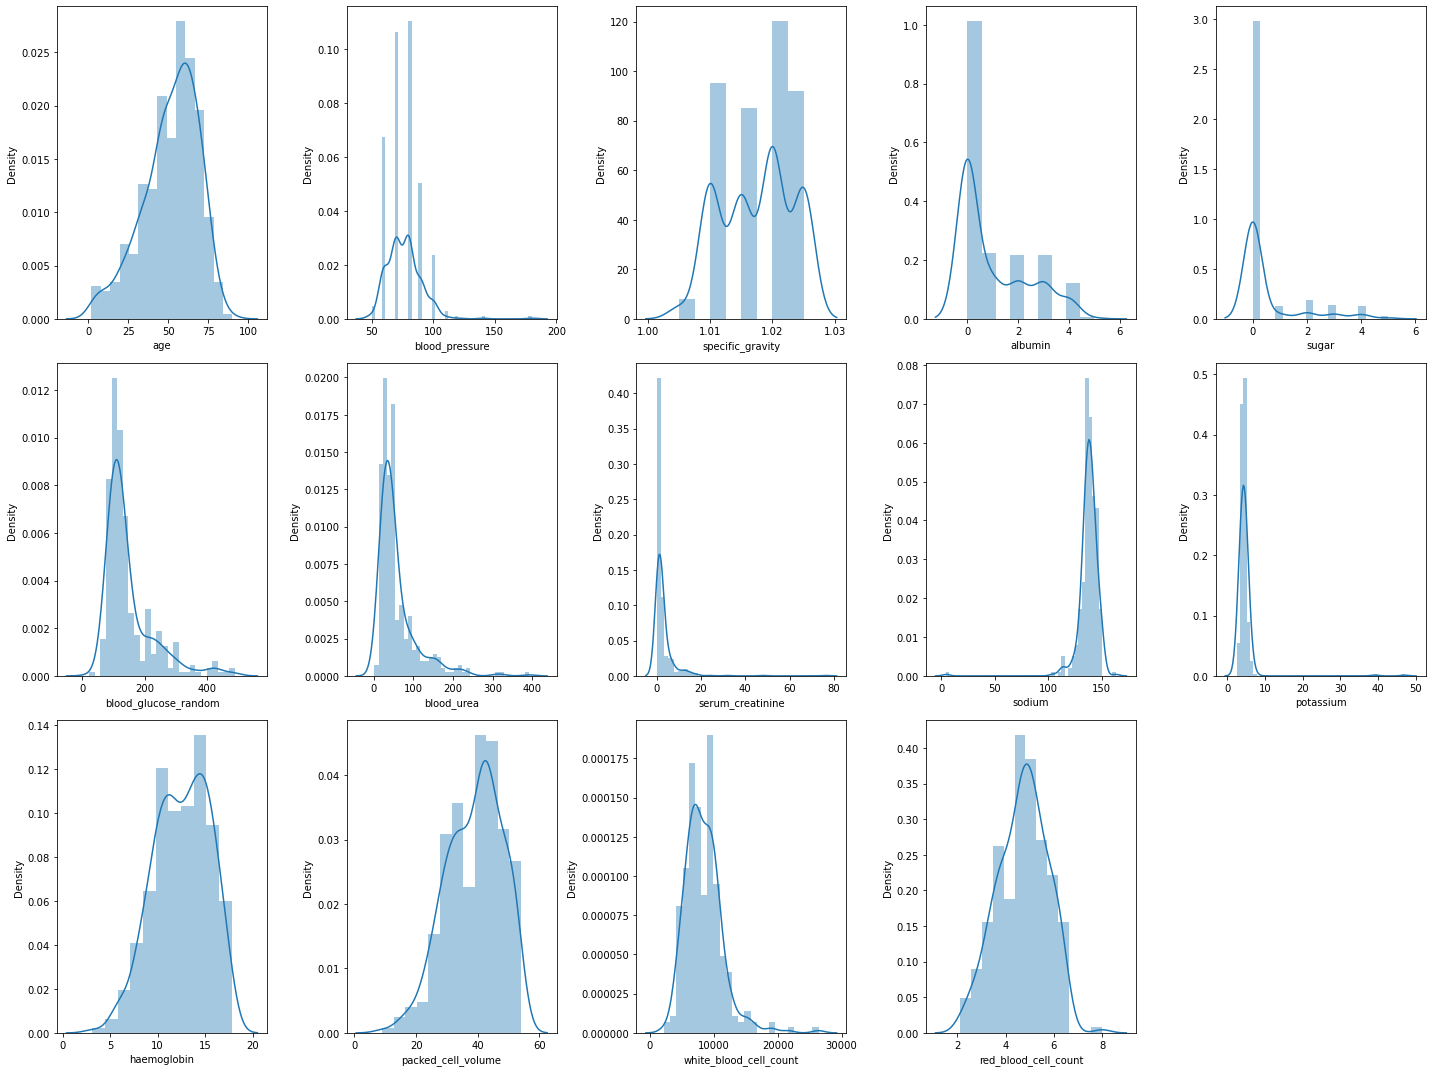

In [16]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is present in some of the columns.


/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

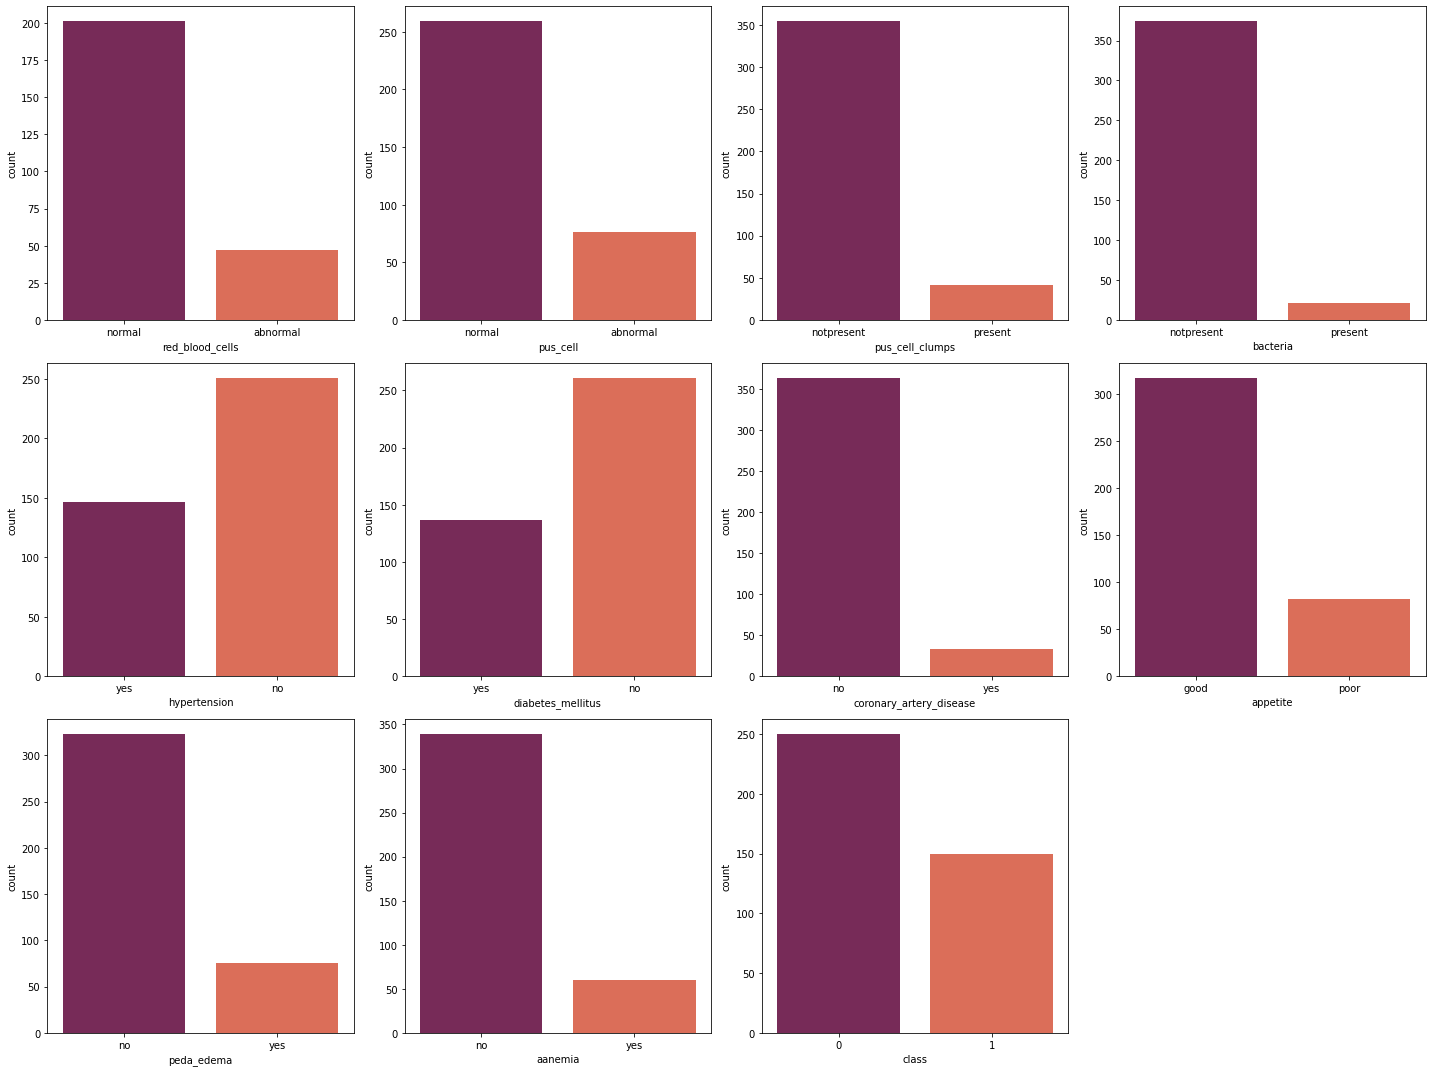

In [17]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

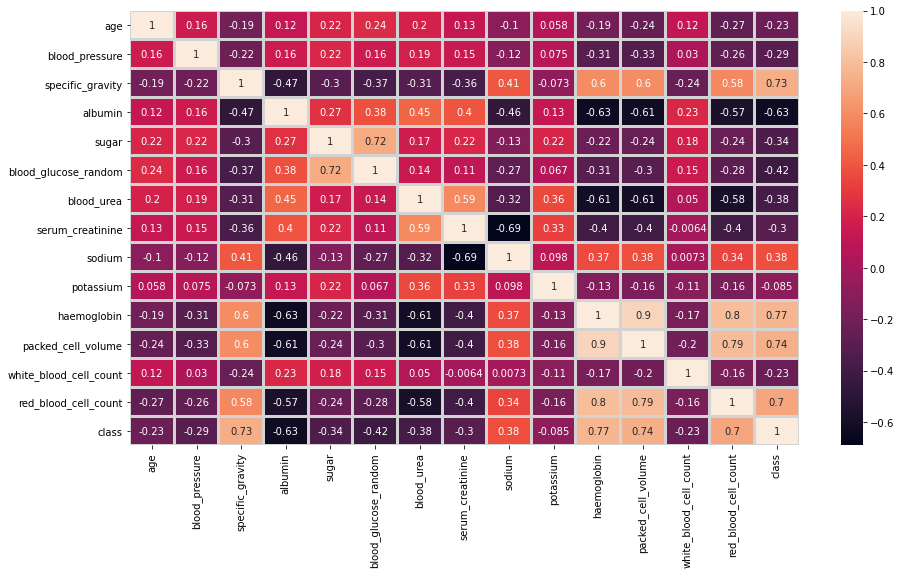

In [18]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

In [19]:


df.columns



Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

# Data Preprocessing

In [20]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [21]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [22]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [23]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [24]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [25]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [26]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [27]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

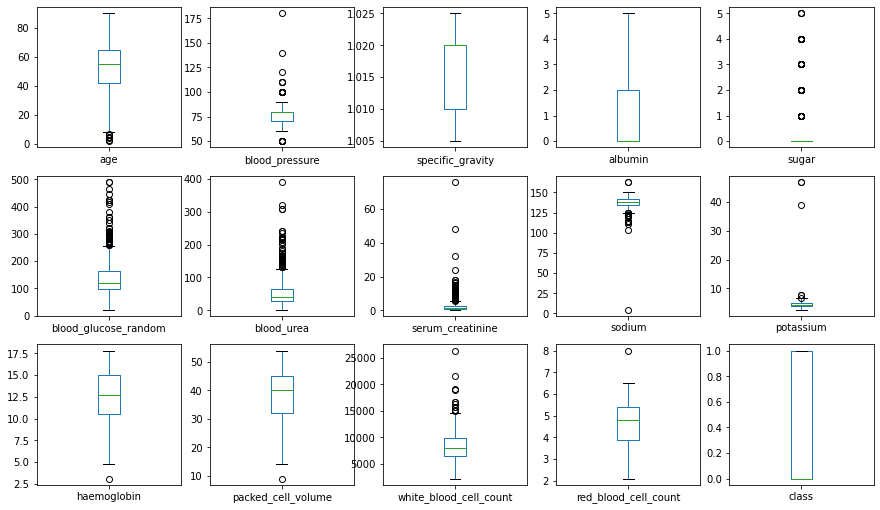

In [28]:
df.plot(kind='box',subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,15))
plt.show()

# Feature Encoding

In [29]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



### As all of the categorical columns have 2 categories we can use label encoder


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,123.0,...,38.0,6000.0,6.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


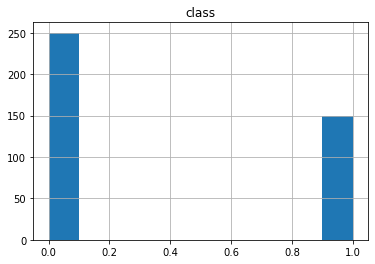

In [32]:
df.hist('class')
plt.savefig('hist_class.png')

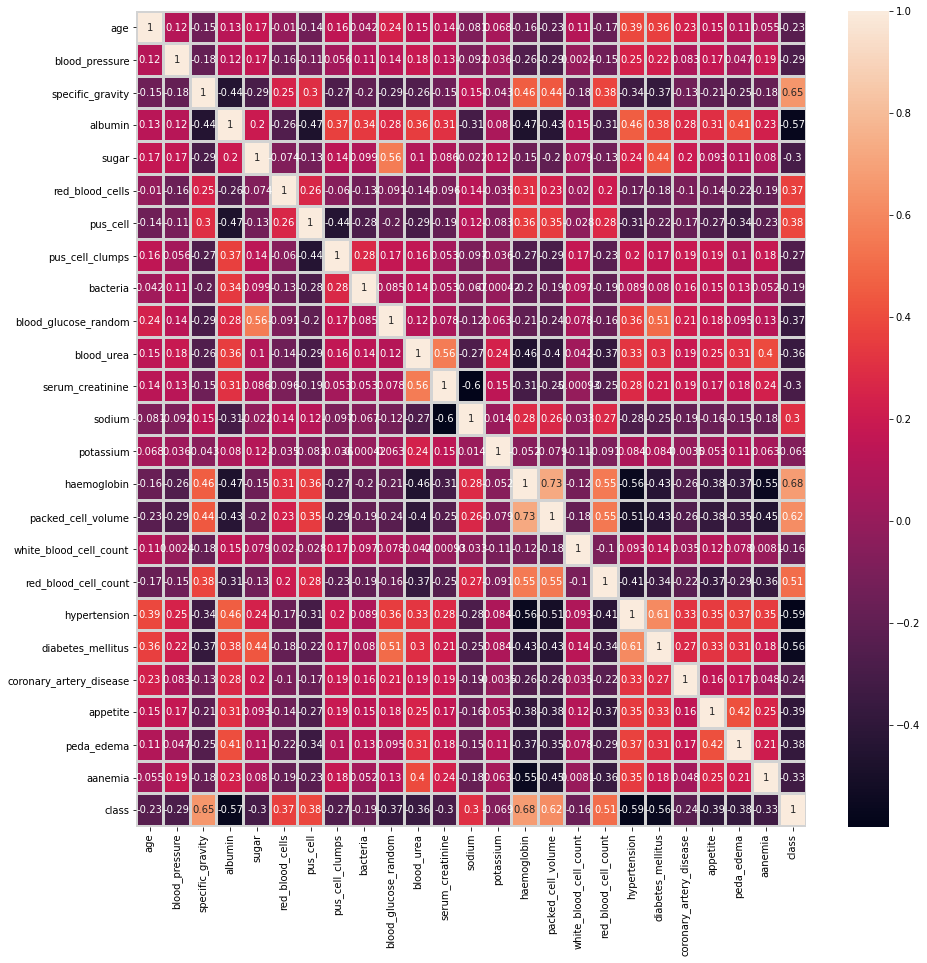

In [33]:
# heatmap of data

plt.figure(figsize = (15, 15))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

# 1. Analysis with all original variables

## a) Logistic Regression

In [34]:
df['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

In [35]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 24)
(400,)


In [36]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [37]:
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

In [38]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 24)
(120, 24)


<ipython-input-38-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-38-d7f94eb42af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [39]:
# GridSearchCV
param_grid = { 'penalty' : ['l2'],'C' : [100, 10, 1.0, 0.1, 0.01],'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Creamos una regresion logistica
log_reg1=LogisticRegression()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(log_reg1, param_grid, n_jobs=-1, cv=3)

# 
log_reg1=model.fit(X_train, Y_train)
print(log_reg1.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [40]:
log_reg1_acc = accuracy_score(Y_test, log_reg1.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(Y_train, log_reg1.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {log_reg1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, log_reg1.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, log_reg1.predict(X_test))}")

Training Accuracy of Logistic Regression is 1.0
Test Accuracy of Logistic Regression is 0.9833333333333333 

Confusion Matrix :- 
[[77  1]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



[[77  1]
 [ 1 41]]


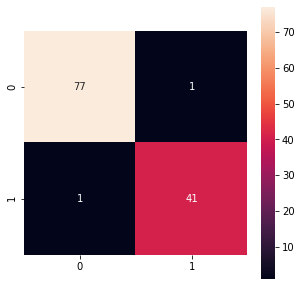

In [41]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, log_reg1.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("log_reg1_matrix.jpg")
plt.show()

## b) Discriminant analysis

### 1) Lineal Discriminant analysis

In [42]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

(400, 24)
(400,)


In [43]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [44]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 24)
(120, 24)


<ipython-input-44-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-44-d7f94eb42af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# GridSearchCV
param_grid = { 'solver' : ['lsqr', 'eigen']}

# Creamos un analisis de discriminante lineal
lin_da1=LinearDiscriminantAnalysis()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(lin_da1, param_grid, n_jobs=-1, cv=3)


lin_da1=model.fit(X_train, Y_train)
print(lin_da1.best_params_)

{'solver': 'lsqr'}


In [46]:
lin_da1.cv_results_

{'mean_fit_time': array([0.00680955, 0.00356126]),
 'std_fit_time': array([0.0010002 , 0.00022179]),
 'mean_score_time': array([0.00169921, 0.00154018]),
 'std_score_time': array([2.38394736e-05, 6.81162618e-05]),
 'param_solver': masked_array(data=['lsqr', 'eigen'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'lsqr'}, {'solver': 'eigen'}],
 'split0_test_score': array([0.96808511, 0.96808511]),
 'split1_test_score': array([0.95698925, 0.95698925]),
 'split2_test_score': array([0.92473118, 0.92473118]),
 'mean_test_score': array([0.94993518, 0.94993518]),
 'std_test_score': array([0.01838859, 0.01838859]),
 'rank_test_score': array([1, 1], dtype=int32)}

In [47]:
lin_da1_acc = accuracy_score(Y_test, lin_da1.predict(X_test))

print(f"Training Accuracy of Linear Discriminant Analysis is {accuracy_score(Y_train, lin_da1.predict(X_train))}")
print(f"Test Accuracy of Linear Discriminant Analysis is {lin_da1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, lin_da1.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, lin_da1.predict(X_test))}")

Training Accuracy of Linear Discriminant Analysis is 0.975
Test Accuracy of Linear Discriminant Analysis is 0.95 

Confusion Matrix :- 
[[73  5]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        78
           1       0.89      0.98      0.93        42

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.95      0.95      0.95       120



[[73  5]
 [ 1 41]]


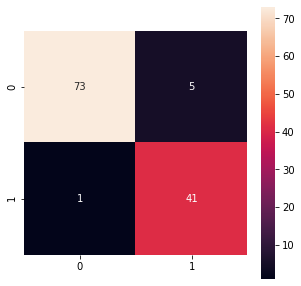

In [48]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, lin_da1.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("lin_da1_matrix.jpg")
plt.show()

## c) Naive Bayes

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

### 2. Discrete variables

In [58]:
# Obtenemos X e Y
X = df[int_cols]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 10)
(400,)


In [59]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [60]:
from sklearn.naive_bayes import BernoulliNB 

#Create a svm Classifier
NB_dis1 = BernoulliNB()

#Train the model using the training sets
NB_dis1.fit(X_train, Y_train)

BernoulliNB()

In [61]:
NB_dis1_acc = accuracy_score(Y_test, NB_dis1.predict(X_test))

print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(Y_train, NB_dis1.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes is {NB_dis1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, NB_dis1.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, NB_dis1.predict(X_test))}")

Training Accuracy of Gaussian Naive Bayes is 0.9178571428571428
Test Accuracy of Gaussian Naive Bayes is 0.9083333333333333 

Confusion Matrix :- 
[[67 11]
 [ 0 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        78
           1       0.79      1.00      0.88        42

    accuracy                           0.91       120
   macro avg       0.90      0.93      0.90       120
weighted avg       0.93      0.91      0.91       120



[[67 11]
 [ 0 42]]


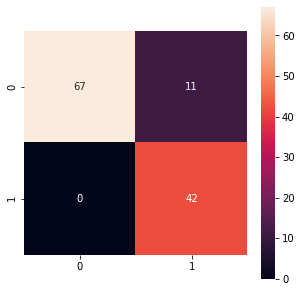

In [62]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, NB_dis1.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("NB_dis1_matrix.jpg")
plt.show()

## d) Metaclassifiers

In [63]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

(400, 24)
(400,)


### 1. Stacking

In [64]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])


print(X.shape)


(400, 24)


>lr 0.975 (0.029)
>knn 0.932 (0.039)
>cart 0.954 (0.034)
>svm 0.975 (0.025)
>stacking 0.975 (0.027)


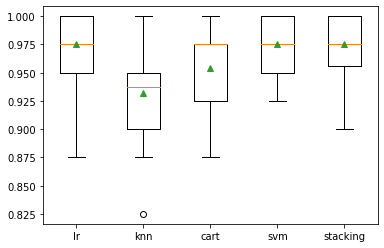

In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# get a list of models to evaluate

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['stacking'] = get_stacking()
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    if name == 'stacking':
        stack1_acc = np.mean(scores)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 2. Bagging

>10 0.975 (0.026)
>50 0.974 (0.027)
>100 0.969 (0.030)
>500 0.973 (0.027)
>1000 0.972 (0.026)
>5000 0.972 (0.027)


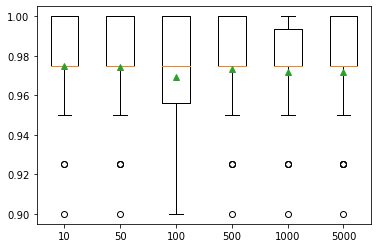

In [66]:
from sklearn.ensemble import BaggingClassifier

def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, accuracies = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, Y)
    # store the results
    results.append(scores)
    names.append(name)
    accuracies.append(np.mean(scores))
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
bag1_acc = max(accuracies)
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 3. Randomization

In [68]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

(400, 24)
(400,)


In [69]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 24)
(120, 24)


<ipython-input-69-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-69-d7f94eb42af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [70]:
from sklearn.ensemble import RandomForestClassifier

RF1 = RandomForestClassifier()
# define the grid of values to search
grid = dict()
grid['max_samples'] = np.arange(0.1, 1.1, 0.2)
grid['max_features'] = np.arange(1,14,2)
grid['n_estimators'] = [10, 50, 100]
grid['max_depth'] = np.arange(1,8,1)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=RF1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
RF1 = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (RF1.best_score_, RF1.best_params_))
# summarize all scores that were evaluated
means = RF1.cv_results_['mean_test_score']
stds = RF1.cv_results_['std_test_score']
params = RF1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988095 using {'max_depth': 7, 'max_features': 1, 'max_samples': 0.7000000000000001, 'n_estimators': 100}
0.865476 (0.096134) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 10}
0.922619 (0.065908) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 50}
0.936905 (0.068190) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 100}
0.895238 (0.109860) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 10}
0.930952 (0.074877) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 50}
0.938095 (0.061813) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 100}
0.867857 (0.117785) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimators': 10}
0.936905 (0.063677) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimato

In [71]:
RF1_acc = accuracy_score(Y_test, RF1.predict(X_test))

print(f"Training Accuracy of Random Forest is {accuracy_score(Y_train, RF1.predict(X_train))}")
print(f"Test Accuracy of Random Forest is {RF1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, RF1.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, RF1.predict(X_test))}")


Training Accuracy of Random Forest is 0.9964285714285714
Test Accuracy of Random Forest is 1.0 

Confusion Matrix :- 
[[78  0]
 [ 0 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



[[78  0]
 [ 0 42]]


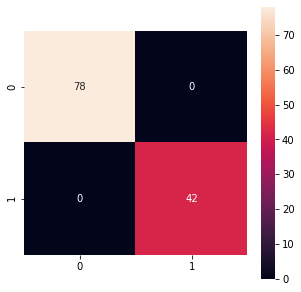

In [72]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, RF1.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("RF1_matrix.jpg")
plt.show()

### 4. Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

GB1 = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=GB1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
GB1 = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (GB1.best_score_, GB1.best_params_))
# summarize all scores that were evaluated
means = GB1.cv_results_['mean_test_score']
stds = GB1.cv_results_['std_test_score']
params = GB1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972619 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001,

In [74]:
GB1_acc = accuracy_score(Y_test, GB1.predict(X_test))

print(f"Training Accuracy of Gradient Boosting is {accuracy_score(Y_train, GB1.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting is {GB1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, GB1.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, GB1.predict(X_test))}")


Training Accuracy of Gradient Boosting is 1.0
Test Accuracy of Gradient Boosting is 0.9833333333333333 

Confusion Matrix :- 
[[77  1]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



[[77  1]
 [ 1 41]]


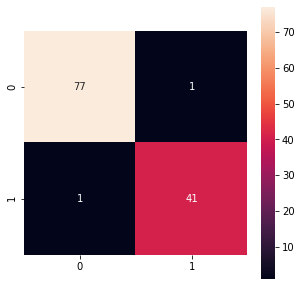

In [75]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, GB1.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("GB1_matrix.jpg")
plt.show()

## 2) With a univariate filter feature subset selection

## Mutual information filter will be used

In [76]:
df_mut = df

In [77]:
# Obtenemos X e Y
X = df_mut.drop(['class'], axis = 1)
Y = df_mut['class']
print(X.shape)
print(Y.shape)

(400, 24)
(400,)


In [78]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

Text(0.5, 1.0, 'Ordenamiento de características con el estadístico de informacion mutua y el conjunto de train')

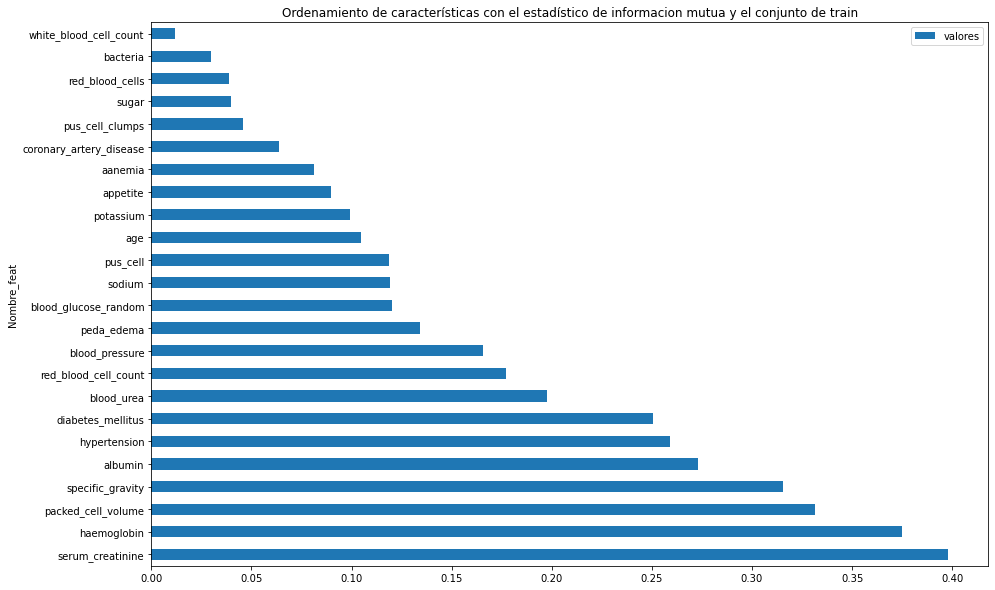

In [79]:
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif, k=24)
fit_MI = bestfeatures_MI.fit(X_train, Y_train)

# gráfico de barras utilizando matplotlib
df_mut = pd.DataFrame({'Nombre_feat':X.columns, 'valores':fit_MI.scores_})
df_ordenado = df_mut.sort_values('valores', ascending=False)
plt.rcParams["figure.figsize"] = (15, 10)
ax = df_ordenado.plot.barh(x='Nombre_feat', y='valores', rot=0)
plt.savefig('inf_mutua.jpg')
plt.title("Ordenamiento de características con el estadístico de informacion mutua y el conjunto de train")

## a) Logistic Regression

In [80]:
# Obtenemos X e Y
X = df[['serum_creatinine','albumin','haemoglobin','specific_gravity','packed_cell_volume']]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 5)
(400,)


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [82]:
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

In [83]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 5)
(120, 5)


<ipython-input-83-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [84]:
# GridSearchCV
param_grid = { 'penalty' : ['l2'],'C' : [100, 10, 1.0, 0.1, 0.01],'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Creamos una regresion logistica
log_reg2=LogisticRegression()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(log_reg2, param_grid, n_jobs=-1, cv=3)

# 
log_reg2=model.fit(X_train, Y_train)
print(log_reg2.best_params_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [85]:
log_reg2_acc = accuracy_score(Y_test, log_reg2.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(Y_train, log_reg2.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {log_reg2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, log_reg2.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, log_reg2.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.9785714285714285
Test Accuracy of Logistic Regression is 0.9583333333333334 

Confusion Matrix :- 
[[73  3]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.93      0.95      0.94        44

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



[[73  3]
 [ 2 42]]


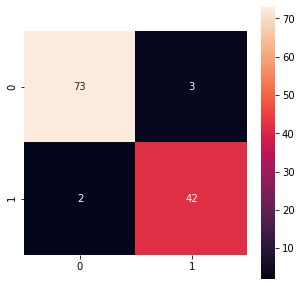

In [86]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, log_reg2.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("log_reg2_matrix.jpg")
plt.show()

## b) Discriminant Analysis

In [87]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


In [88]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 5)
(120, 5)


<ipython-input-88-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# GridSearchCV
param_grid = { 'solver' : ['lsqr', 'eigen']}

# Creamos un analisis de discriminante lineal
lin_da2=LinearDiscriminantAnalysis()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(lin_da2, param_grid, n_jobs=-1, cv=3)


lin_da2=model.fit(X_train, Y_train)
print(lin_da2.best_params_)

{'solver': 'lsqr'}


In [90]:
lin_da2_acc = accuracy_score(Y_test, lin_da2.predict(X_test))

print(f"Training Accuracy of Linear Discriminant Analysis is {accuracy_score(Y_train, lin_da2.predict(X_train))}")
print(f"Test Accuracy of Linear Discriminant Analysis is {lin_da2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, lin_da2.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, lin_da2.predict(X_test))}")

Training Accuracy of Linear Discriminant Analysis is 0.9321428571428572
Test Accuracy of Linear Discriminant Analysis is 0.9083333333333333 

Confusion Matrix :- 
[[68 10]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93        78
           1       0.80      0.98      0.88        42

    accuracy                           0.91       120
   macro avg       0.89      0.92      0.90       120
weighted avg       0.92      0.91      0.91       120



[[68 10]
 [ 1 41]]


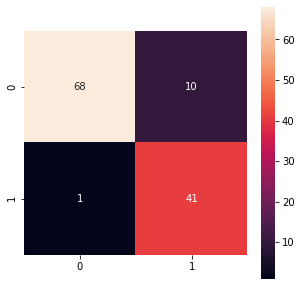

In [91]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, lin_da2.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("lin_da2_matrix.jpg")
plt.show()

## c) Naive Bayes

### Discrete variables

#### Feature Selection between discrete variables

In [113]:
df_mut = df

In [114]:
# Obtenemos X e Y
X = df_mut.drop(['class'], axis = 1)
Y = df_mut['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

X = df_mut[int_cols]
Y = df_mut['class']
print(X.shape)
print(Y.shape)


(400, 24)
(400,)
(400, 10)
(400,)


In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Ordenamiento de características con el estadístico de informacion mutua y el conjunto de train')

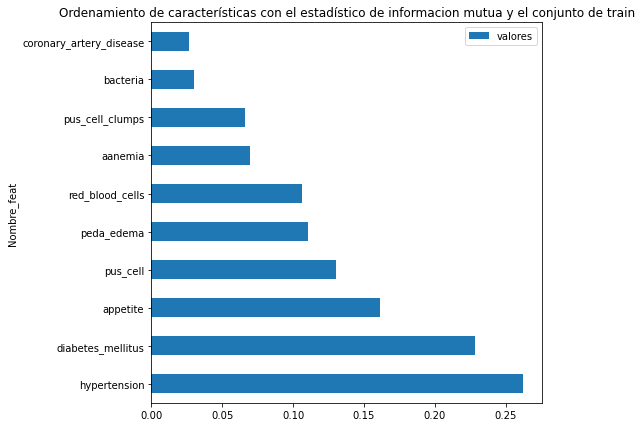

In [116]:
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif, k=10)
fit_MI = bestfeatures_MI.fit(X_train, Y_train)

# gráfico de barras utilizando matplotlib
df_mut = pd.DataFrame({'Nombre_feat':X.columns, 'valores':fit_MI.scores_})
df_ordenado = df_mut.sort_values('valores', ascending=False)
plt.rcParams["figure.figsize"] = (7, 7)
ax = df_ordenado.plot.barh(x='Nombre_feat', y='valores', rot=0)
plt.savefig('inf_mutua_int.jpg')
plt.title("Ordenamiento de características con el estadístico de informacion mutua y el conjunto de train")

#### Now, the algorithm

In [117]:
# Obtenemos X e Y
X = df[['hypertension','diabetes_mellitus','appetite','pus_cell']]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 4)
(400,)


In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [119]:
from sklearn.naive_bayes import BernoulliNB 

#Create a svm Classifier
NB_dis2 = BernoulliNB()

#Train the model using the training sets
NB_dis2.fit(X_train, Y_train)

BernoulliNB()

In [121]:
NB_dis2_acc = accuracy_score(Y_test, NB_dis2.predict(X_test))

print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(Y_train, NB_dis2.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes is {NB_dis2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, NB_dis2.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, NB_dis2.predict(X_test))}")

Training Accuracy of Gaussian Naive Bayes is 0.8928571428571429
Test Accuracy of Gaussian Naive Bayes is 0.8916666666666667 

Confusion Matrix :- 
[[64 12]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.84      0.91        76
           1       0.78      0.98      0.87        44

    accuracy                           0.89       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.91      0.89      0.89       120



[[64 12]
 [ 1 43]]


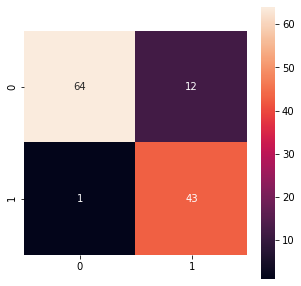

In [122]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, NB_dis2.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("NB_dis2_matrix.jpg")
plt.show()

## d) Metaclassifiers

### 1. Stacking

In [123]:
# Obtenemos X e Y
X = df[['serum_creatinine','albumin','haemoglobin','specific_gravity','packed_cell_volume']]
Y = df['class']
print(X.shape)
print(Y.shape)
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

(400, 5)
(400,)


In [124]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])

print(X.shape)


(400, 5)


<ipython-input-124-b42654b46944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[float_cols] = scaler.fit_transform(X[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

>lr 0.959 (0.031)
>knn 0.958 (0.031)
>cart 0.964 (0.033)
>svm 0.963 (0.032)
>stacking 0.969 (0.029)


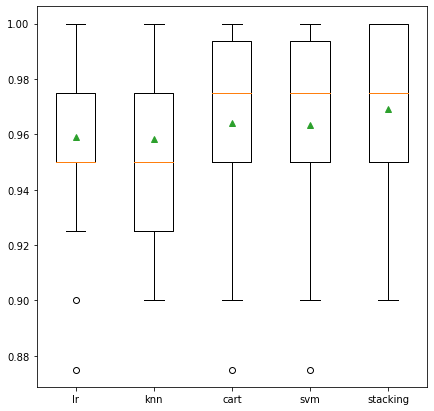

In [125]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# get a list of models to evaluate

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['stacking'] = get_stacking()
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    if name == 'stacking':
        stack2_acc = np.mean(scores)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 2. Bagging

>10 0.969 (0.028)
>50 0.969 (0.028)
>100 0.970 (0.030)
>500 0.970 (0.028)
>1000 0.968 (0.030)
>5000 0.968 (0.030)


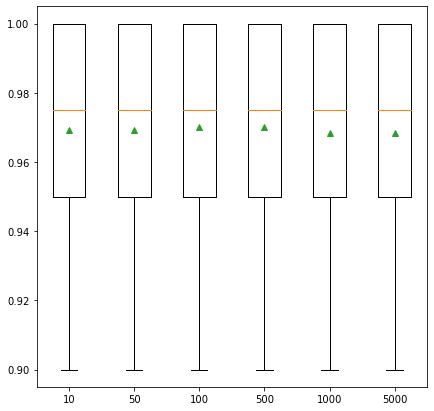

In [126]:
from sklearn.ensemble import BaggingClassifier

def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, accuracies = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, Y)
    # store the results
    results.append(scores)
    names.append(name)
    accuracies.append(np.mean(scores))
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
bag2_acc = max(accuracies)
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 3. Randomization

In [127]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [128]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 5)
(120, 5)


<ipython-input-128-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [129]:
from sklearn.ensemble import RandomForestClassifier

RF2 = RandomForestClassifier()
# define the grid of values to search
grid = dict()
grid['max_samples'] = np.arange(0.1, 1.1, 0.2)
grid['max_features'] = np.arange(1,14,2)
grid['n_estimators'] = [10, 50, 100]
grid['max_depth'] = np.arange(1,8,1)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=RF2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
RF2 = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (RF2.best_score_, RF2.best_params_))
# summarize all scores that were evaluated
means = RF2.cv_results_['mean_test_score']
stds = RF2.cv_results_['std_test_score']
params = RF2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975000 using {'max_depth': 7, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 100}
0.938095 (0.057538) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 10}
0.946429 (0.038850) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 50}
0.950000 (0.043838) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 100}
0.932143 (0.049957) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 10}
0.954762 (0.039051) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 50}
0.955952 (0.038777) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 100}
0.938095 (0.046960) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimators': 10}
0.957143 (0.036187) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimat

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93809524 0.94642857 0.95       0.93214286 0.9547619  0.95595238
 0.93809524 0.95714286 0.95833333 0.93928571 0.95357143 0.96071429
 0.95       0.95357143 0.95833333 0.925      0.93690476 0.93333333
 0.91785714 0.93571429 0.93452381 0.91071429 0.93809524 0.93809524
 0.92142857 0.92380952 0.94047619 0.91904762 0.91785714 0.93571429
 0.90119048 0.92857143 0.9297619  0.90357143 0.91547619 0.92380952
 0.89166667 0.9047619  0.90833333 0.88095238 0.89880952 0.88928571
 0.88809524 0.89404762 0.89642857        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 

In [130]:
RF2_acc = accuracy_score(Y_test, RF2.predict(X_test))

print(f"Training Accuracy of Random Forest is {accuracy_score(Y_train, RF2.predict(X_train))}")
print(f"Test Accuracy of Random Forest is {RF2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, RF2.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, RF2.predict(X_test))}")

Training Accuracy of Random Forest is 0.9821428571428571
Test Accuracy of Random Forest is 0.975 

Confusion Matrix :- 
[[76  2]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.95      0.98      0.96        42

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



[[76  2]
 [ 1 41]]


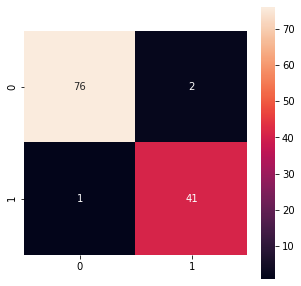

In [131]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, RF2.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("RF2_matrix.jpg")
plt.show()

### 4. Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

GB2 = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=GB2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
GB2 = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (GB2.best_score_, GB2.best_params_))
# summarize all scores that were evaluated
means = GB2.cv_results_['mean_test_score']
stds = GB2.cv_results_['std_test_score']
params = GB2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969048 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 

In [133]:
GB2_acc = accuracy_score(Y_test, GB2.predict(X_test))

print(f"Training Accuracy of Gradient Boosting is {accuracy_score(Y_train, GB2.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting is {GB2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, GB2.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, GB2.predict(X_test))}")

Training Accuracy of Gradient Boosting is 1.0
Test Accuracy of Gradient Boosting is 0.9916666666666667 

Confusion Matrix :- 
[[78  0]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        42

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



[[78  0]
 [ 1 41]]


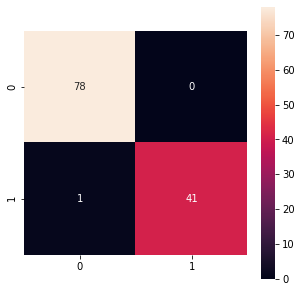

In [134]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, GB2.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("GB2_matrix.jpg")
plt.show()

# 3. With a multivariate filter feature subset selection

In [135]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(400, 24)
(400,)
(280, 24)
(120, 24)


<ipython-input-135-11ecb6757849>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-135-11ecb6757849>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [136]:
import sklearn_relief as relief
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn_relief import Relief

fs = Relief(n_features = 5, random_state=0)
X_m_5 = fs.fit(X_train.values, Y_train.values)
X_m_5_train = fs.transform(X_train.values)
X_m_5_test = fs.transform(X_test.values)
X_train_values = X_train.values.T
features_index = []
for feature in X_m_5_train.T:
    for feature_i in range(len(X_train_values)):
        if np.array_equal(feature, X_train_values[feature_i]):
            features_index.append(feature_i)

features_names = X_train.columns
features_names[features_index]

Index(['specific_gravity', 'albumin', 'haemoglobin', 'red_blood_cell_count',
       'age'],
      dtype='object')

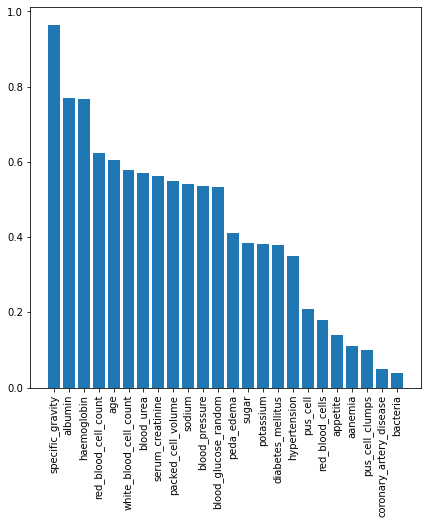

(['specific_gravity', 'albumin', 'haemoglobin', 'red_blood_cell_count', 'age'],
 array([[-0.4269075 ,  1.546496  , -0.59193234, -0.34275184, -0.36284206],
        [ 0.46513802, -0.74057555, -0.35428642, -0.24581193, -1.99660382],
        [ 0.46513802, -0.74057555,  0.59629726,  1.11134689,  1.39193908],
        ...,
        [-1.31895301,  1.546496  , -0.76167943, -0.7305115 ,  0.72633244],
        [-0.4269075 ,  1.546496  , -1.67831369, -1.79685057, -0.72590023],
        [-0.4269075 ,  2.30885318, -0.52403351,  1.11134689,  0.78684214]]),
 array([[-1.20489245, -0.81340973, -0.3997183 , -0.8479828 ,  0.78744716],
        [-1.20489245, -0.12602123, -0.50914688, -0.74733202,  0.569217  ],
        [-1.20489245,  1.24875578, -0.43619449, -0.24407813,  0.51465946],
        [ 1.27374345,  1.24875578, -0.03495635, -0.8479828 ,  0.62377454],
        [ 1.27374345, -0.81340973,  1.6064724 ,  1.3663343 , -0.90383657],
        [ 1.27374345, -0.81340973, -1.01981361, -1.04928435,  0.569217  ],
     

In [138]:
def select_features_multivariate(X_train_data, X_test_data, Y_train_data, features_to_keep=5):
    fs = Relief(n_features = features_to_keep, random_state=0)
    X_m = fs.fit(X_train_data.values, Y_train_data.values)
    weigths = fs.w_
    X_m_train = fs.transform(X_train_data.values)
    X_m_test = fs.transform(X_test_data.values)
    X_train_values = X_train_data.values.T
    features_index = []
    features_names = X_train_data.columns
    features_sorted = [x for _,x in sorted(zip(weigths, features_names), reverse=True)]
    w_sorted = sorted(weigths, reverse=True)
    for feature in X_m_train.T:
        for feature_i in range(len(X_train_values)):
            if np.array_equal(feature, X_train_values[feature_i]):
                features_index.append(feature_i)

    plt.bar(features_sorted, w_sorted)
    plt.xticks(rotation=90)
    plt.show()
    return features_sorted[:features_to_keep], X_m_train, X_m_test

select_features_multivariate(X_train,X_test,Y_train)

## a) Logistic Regression

In [139]:
# Obtenemos X e Y
X = df[['specific_gravity', 'albumin', 'haemoglobin', 'red_blood_cell_count', 'age']]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 5)
(400,)


In [140]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [141]:
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

In [142]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 5)
(120, 5)


<ipython-input-142-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [143]:
# GridSearchCV
param_grid = { 'penalty' : ['l2'],'C' : [100, 10, 1.0, 0.1, 0.01],'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Creamos una regresion logistica
log_reg3=LogisticRegression()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(log_reg3, param_grid, n_jobs=-1, cv=3)

# 
log_reg3=model.fit(X_train, Y_train)
print(log_reg3.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [144]:
log_reg3_acc = accuracy_score(Y_test, log_reg3.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(Y_train, log_reg3.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {log_reg3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, log_reg3.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, log_reg3.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.9607142857142857
Test Accuracy of Logistic Regression is 0.9416666666666667 

Confusion Matrix :- 
[[72  6]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        78
           1       0.87      0.98      0.92        42

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



[[72  6]
 [ 1 41]]


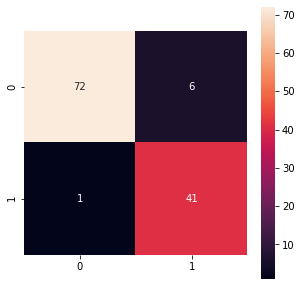

In [145]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, log_reg3.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("log_reg3_matrix.jpg")
plt.show()

## b) Discriminant Analysis

In [146]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [147]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 5)
(120, 5)


<ipython-input-147-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# GridSearchCV
param_grid = { 'solver' : ['lsqr', 'eigen']}

# Creamos un analisis de discriminante lineal
lin_da3=LinearDiscriminantAnalysis()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(lin_da3, param_grid, n_jobs=-1, cv=3)


lin_da3=model.fit(X_train, Y_train)
print(lin_da3.best_params_)

{'solver': 'lsqr'}


In [149]:
lin_da3_acc = accuracy_score(Y_test, lin_da3.predict(X_test))

print(f"Training Accuracy of Linear Discriminant Analysis is {accuracy_score(Y_train, lin_da3.predict(X_train))}")
print(f"Test Accuracy of Linear Discriminant Analysis is {lin_da3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, lin_da3.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, lin_da3.predict(X_test))}")

Training Accuracy of Linear Discriminant Analysis is 0.9392857142857143
Test Accuracy of Linear Discriminant Analysis is 0.925 

Confusion Matrix :- 
[[70  8]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        78
           1       0.84      0.98      0.90        42

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120



[[70  8]
 [ 1 41]]


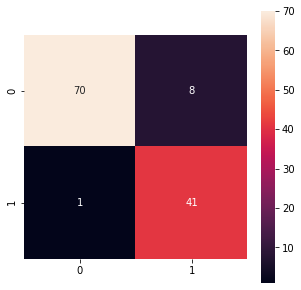

In [150]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, lin_da3.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("lin_da3_matrix.jpg")
plt.show()

## c) Naive Bayes

### Discrete variables

#### Feature Selection between discrete variables

In [151]:
df_mut = df

In [152]:
# Obtenemos X e Y
X = df_mut.drop(['class'], axis = 1)
Y = df_mut['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

X = df_mut[int_cols]
Y = df_mut['class']
print(X.shape)
print(Y.shape)


(400, 24)
(400,)
(400, 10)
(400,)


In [153]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [154]:
fs = Relief(n_features = 5, random_state=0)
X_m_5 = fs.fit(X_train.values, Y_train.values)
X_m_5_train = fs.transform(X_train.values)
X_m_5_test = fs.transform(X_test.values)
X_train_values = X_train.values.T
features_index = []
for feature in X_m_5_train.T:
    for feature_i in range(len(X_train_values)):
        if np.array_equal(feature, X_train_values[feature_i]):
            features_index.append(feature_i)

features_names = X_train.columns
features_names[features_index]



Index(['diabetes_mellitus', 'hypertension', 'peda_edema', 'appetite',
       'red_blood_cells'],
      dtype='object')

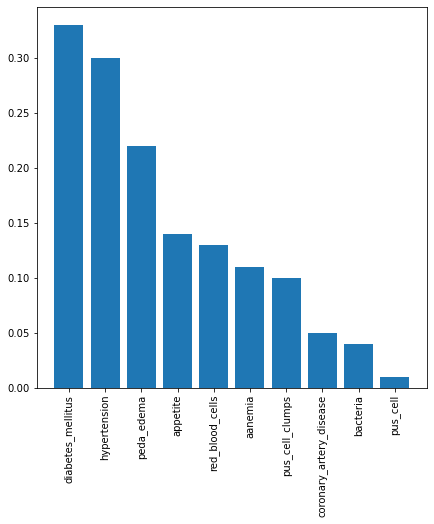

(['diabetes_mellitus',
  'hypertension',
  'peda_edema',
  'appetite',
  'red_blood_cells'],
 array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        ...,
        [1, 1, 1, 0, 0],
        [0, 1, 0, 0, 1],
        [1, 1, 0, 0, 1]]),
 array([[1, 0, 0, 0, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 0, 0, 0],
        [1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 0, 0],
        [0, 0, 1, 1, 0],
        [1, 1, 1, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [1, 1, 1,

In [155]:
select_features_multivariate(X_train,X_test,Y_train)

#### Now, the algorithm

In [156]:
# Obtenemos X e Y
X = df[['diabetes_mellitus', 'hypertension', 'peda_edema', 'appetite','red_blood_cells']]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 5)
(400,)


In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [158]:
from sklearn.naive_bayes import BernoulliNB 

#Create a svm Classifier
NB_dis3 = BernoulliNB()

#Train the model using the training sets
NB_dis3.fit(X_train, Y_train)

BernoulliNB()

In [159]:
NB_dis3_acc = accuracy_score(Y_test, NB_dis3.predict(X_test))

print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(Y_train, NB_dis3.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes is {NB_dis3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, NB_dis3.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, NB_dis3.predict(X_test))}")

Training Accuracy of Gaussian Naive Bayes is 0.9214285714285714
Test Accuracy of Gaussian Naive Bayes is 0.9166666666666666 

Confusion Matrix :- 
[[66 10]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        76
           1       0.81      1.00      0.90        44

    accuracy                           0.92       120
   macro avg       0.91      0.93      0.91       120
weighted avg       0.93      0.92      0.92       120



[[66 10]
 [ 0 44]]


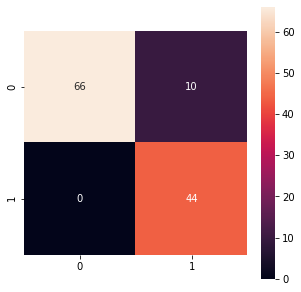

In [160]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, NB_dis3.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("NB_dis3_matrix.jpg")
plt.show()

## d) Metaclassifiers

### 1. Stacking

In [161]:
# Obtenemos X e Y
X = df[['specific_gravity', 'albumin', 'haemoglobin', 'red_blood_cell_count', 'age']]
Y = df['class']
print(X.shape)
print(Y.shape)
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

(400, 5)
(400,)


In [162]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])

print(X.shape)


(400, 5)


<ipython-input-162-b42654b46944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[float_cols] = scaler.fit_transform(X[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

>lr 0.955 (0.030)
>knn 0.940 (0.031)
>cart 0.953 (0.036)
>svm 0.959 (0.028)
>stacking 0.966 (0.026)


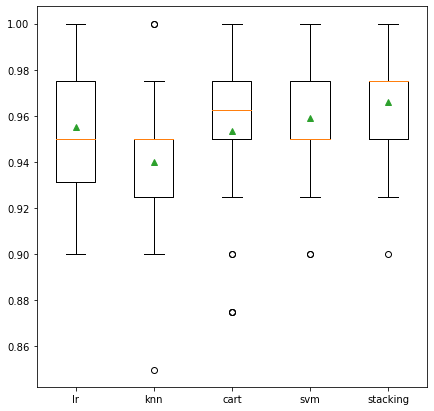

In [163]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# get a list of models to evaluate

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['stacking'] = get_stacking()
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    if name == 'stacking':
        stack3_acc = np.mean(scores)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 2. Bagging

>10 0.965 (0.028)
>50 0.972 (0.028)
>100 0.966 (0.029)
>500 0.968 (0.029)
>1000 0.968 (0.029)
>5000 0.968 (0.029)


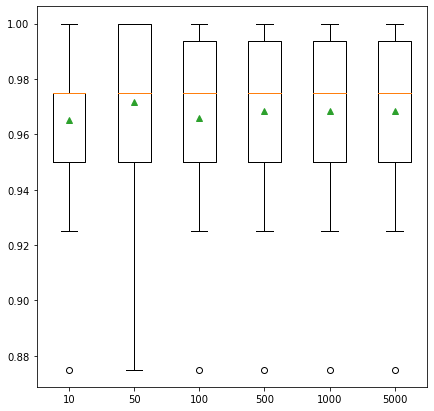

In [164]:
from sklearn.ensemble import BaggingClassifier

def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, accuracies = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, Y)
    # store the results
    results.append(scores)
    names.append(name)
    accuracies.append(np.mean(scores))
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
bag3_acc = max(accuracies)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 3. Randomization

In [165]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [166]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 5)
(120, 5)


<ipython-input-166-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [167]:
from sklearn.ensemble import RandomForestClassifier

RF3 = RandomForestClassifier()
# define the grid of values to search
grid = dict()
grid['max_samples'] = np.arange(0.1, 1.1, 0.2)
grid['max_features'] = np.arange(1,14,2)
grid['n_estimators'] = [10, 50, 100]
grid['max_depth'] = np.arange(1,8,1)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=RF3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
RF3 = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (RF3.best_score_, RF3.best_params_))
# summarize all scores that were evaluated
means = RF3.cv_results_['mean_test_score']
stds = RF3.cv_results_['std_test_score']
params = RF3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.973810 using {'max_depth': 3, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimators': 50}
0.910714 (0.074773) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 10}
0.945238 (0.041989) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 50}
0.953571 (0.037058) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 100}
0.913095 (0.061641) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 10}
0.955952 (0.035335) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 50}
0.954762 (0.034421) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.30000000000000004, 'n_estimators': 100}
0.917857 (0.063987) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimators': 10}
0.948810 (0.040912) with: {'max_depth': 1, 'max_features': 1, 'max_samples': 0.5000000000000001, 'n_estimator

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91071429 0.9452381  0.95357143 0.91309524 0.95595238 0.9547619
 0.91785714 0.94880952 0.95357143 0.94166667 0.94761905 0.96190476
 0.91190476 0.95       0.96071429 0.90595238 0.91666667 0.92380952
 0.91071429 0.91309524 0.92619048 0.90833333 0.92619048 0.91309524
 0.92380952 0.90714286 0.92142857 0.89761905 0.90833333 0.90952381
 0.89880952 0.8952381  0.89285714 0.87857143 0.88095238 0.88571429
 0.88690476 0.88333333 0.88333333 0.8797619  0.87738095 0.88095238
 0.88333333 0.87738095 0.8797619         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan  

In [168]:
RF3_acc = accuracy_score(Y_test, RF3.predict(X_test))

print(f"Training Accuracy of Random Forest is {accuracy_score(Y_train, RF3.predict(X_train))}")
print(f"Test Accuracy of Random Forest is {RF3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, RF3.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, RF3.predict(X_test))}")

Training Accuracy of Random Forest is 0.9785714285714285
Test Accuracy of Random Forest is 0.9666666666666667 

Confusion Matrix :- 
[[75  3]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        78
           1       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



[[75  3]
 [ 1 41]]


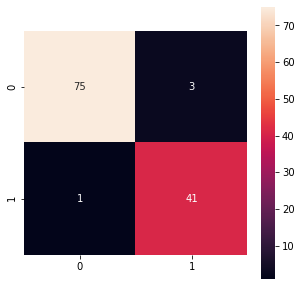

In [169]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, RF3.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("RF3_matrix.jpg")
plt.show()

### 4. Boosting

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

GB3 = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=GB3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
GB3 = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (GB3.best_score_, GB3.best_params_))
# summarize all scores that were evaluated
means = GB3.cv_results_['mean_test_score']
stds = GB3.cv_results_['std_test_score']
params = GB3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972619 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.614286 (0.014286) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.614286 (0.014286) with: {'learning_rate': 0.0001

In [171]:
GB3_acc = accuracy_score(Y_test, GB3.predict(X_test))

print(f"Training Accuracy of Gradient Boosting is {accuracy_score(Y_train, GB3.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting is {GB3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, GB3.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, GB3.predict(X_test))}")

Training Accuracy of Gradient Boosting is 0.9892857142857143
Test Accuracy of Gradient Boosting is 0.9833333333333333 

Confusion Matrix :- 
[[77  1]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



[[77  1]
 [ 1 41]]


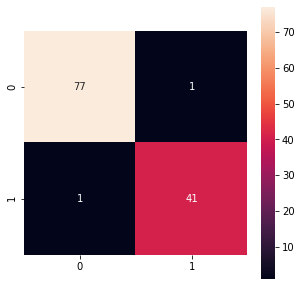

In [172]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, GB3.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("GB3_matrix.jpg")
plt.show()

# 4. With a multivariate wrapper feature subset selection

## Sequential Forward Selection

In [173]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

## a) Logistic Regression

In [174]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

(400, 24)
(400,)


In [175]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [176]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 24)
(120, 24)


<ipython-input-176-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-176-d7f94eb42af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

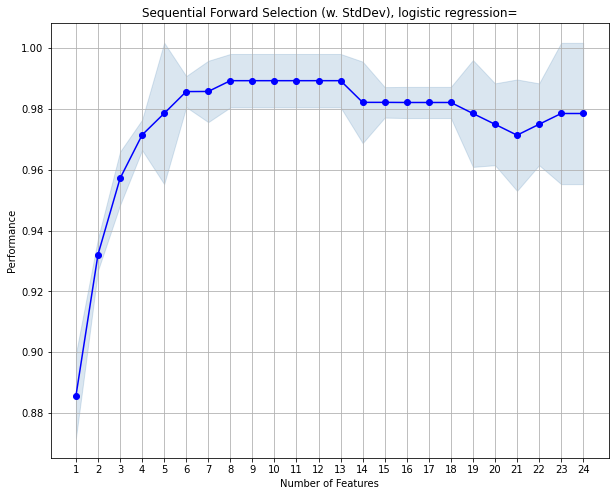

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.9042553191489362, 0.8709677419354839, 0.881...",0.885648,"(serum_creatinine,)",0.031213,0.01387,0.009808
2,"(2, 11)","[0.9361702127659575, 0.9354838709677419, 0.924...",0.932128,"(specific_gravity, serum_creatinine)",0.011788,0.005238,0.003704
3,"(2, 3, 11)","[0.9574468085106383, 0.967741935483871, 0.9462...",0.957142,"(specific_gravity, albumin, serum_creatinine)",0.019763,0.008782,0.00621
4,"(2, 3, 11, 21)","[0.9680851063829787, 0.978494623655914, 0.9677...",0.971441,"(specific_gravity, albumin, serum_creatinine, ...",0.011229,0.00499,0.003528
5,"(2, 3, 9, 11, 21)","[0.9893617021276596, 1.0, 0.946236559139785]",0.978533,"(specific_gravity, albumin, blood_glucose_rand...",0.052312,0.023246,0.016438
6,"(1, 2, 3, 9, 11, 21)","[0.9893617021276596, 0.989247311827957, 0.9784...",0.985701,"(blood_pressure, specific_gravity, albumin, bl...",0.011468,0.005096,0.003603
7,"(1, 2, 3, 4, 9, 11, 21)","[0.9787234042553191, 1.0, 0.978494623655914]",0.985739,"(blood_pressure, specific_gravity, albumin, su...",0.022693,0.010084,0.007131
8,"(1, 2, 3, 4, 9, 11, 21, 23)","[0.9893617021276596, 1.0, 0.978494623655914]",0.989285,"(blood_pressure, specific_gravity, albumin, su...",0.019757,0.00878,0.006208
9,"(1, 2, 3, 4, 7, 9, 11, 21, 23)","[0.9893617021276596, 1.0, 0.978494623655914]",0.989285,"(blood_pressure, specific_gravity, albumin, su...",0.019757,0.00878,0.006208
10,"(1, 2, 3, 4, 7, 8, 9, 11, 21, 23)","[0.9893617021276596, 1.0, 0.978494623655914]",0.989285,"(blood_pressure, specific_gravity, albumin, su...",0.019757,0.00878,0.006208


In [178]:
sfs = SFS(log_reg1, 
           k_features=24, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3,
          n_jobs=-1)

sfs = sfs.fit(X_train, Y_train)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
#plt.ylim([0.6, 0.8])
plt.title('Sequential Forward Selection (w. StdDev), logistic regression=')
plt.grid()
plt.rcParams["figure.figsize"] = (10, 8)
plt.savefig('wrapper_logreg.png')
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T


In [179]:
df.iloc[:,[1, 2, 3, 4, 9, 11, 21, 23]]

,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,serum_creatinine,appetite,aanemia
0,80.0,1.020,1.0,0.0,121.0,1.2,0,0
1,50.0,1.020,4.0,0.0,123.0,0.8,0,0
2,80.0,1.010,2.0,3.0,423.0,1.8,1,1
3,70.0,1.005,4.0,0.0,117.0,3.8,1,1
4,80.0,1.010,2.0,0.0,106.0,1.4,0,0
...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,140.0,0.5,0,0
396,70.0,1.025,0.0,0.0,75.0,1.2,0,0
397,80.0,1.020,0.0,0.0,100.0,0.6,0,0
398,60.0,1.025,0.0,0.0,114.0,1.0,0,0


In [180]:
# Obtenemos X e Y
X = df.iloc[:,[1, 2, 3, 4, 9, 11, 21, 23]]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 8)
(400,)


In [181]:
int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

In [182]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [183]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


<ipython-input-183-d7f94eb42af5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-183-d7f94eb42af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [184]:
# GridSearchCV
param_grid = { 'penalty' : ['l2'],'C' : [100, 10, 1.0, 0.1, 0.01],'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Creamos una regresion logistica
log_reg4=LogisticRegression()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(log_reg4, param_grid, n_jobs=-1, cv=3)

# 
log_reg4=model.fit(X_train, Y_train)
print(log_reg4.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [185]:
log_reg4_acc = accuracy_score(Y_test, log_reg4.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(Y_train, log_reg4.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {log_reg4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, log_reg4.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, log_reg4.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.9928571428571429
Test Accuracy of Logistic Regression is 0.9416666666666667 

Confusion Matrix :- 
[[72  6]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        78
           1       0.87      0.98      0.92        42

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



[[72  6]
 [ 1 41]]


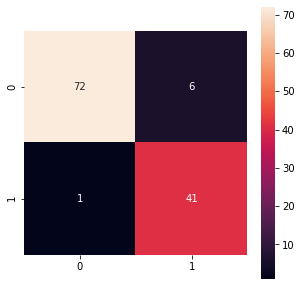

In [186]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, log_reg4.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("log_reg4_matrix.jpg")
plt.show()

## b) Discriminant Analysis

In [187]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(400, 24)
(400,)
(280, 24)
(120, 24)


<ipython-input-187-11ecb6757849>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-187-11ecb6757849>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

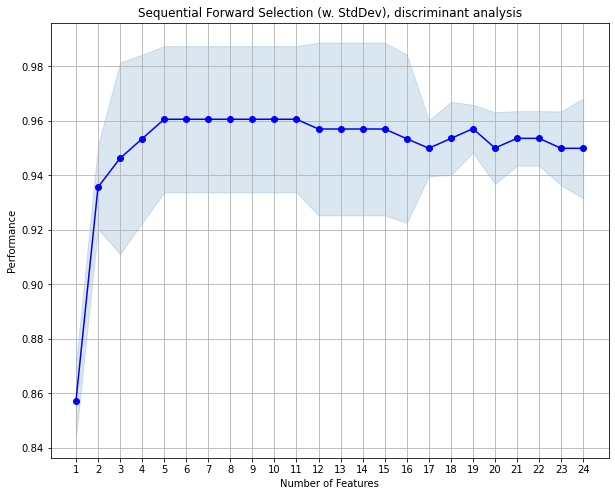

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.8617021276595744, 0.8709677419354839, 0.838...",0.857127,"(haemoglobin,)",0.030517,0.013561,0.009589
2,"(2, 14)","[0.9468085106382979, 0.946236559139785, 0.9139...",0.935675,"(specific_gravity, haemoglobin)",0.034527,0.015343,0.010849
3,"(2, 9, 14)","[0.9893617021276596, 0.946236559139785, 0.9032...",0.946275,"(specific_gravity, blood_glucose_random, haemo...",0.079132,0.035165,0.024865
4,"(2, 5, 9, 14)","[0.9893617021276596, 0.956989247311828, 0.9139...",0.953443,"(specific_gravity, red_blood_cells, blood_gluc...",0.069484,0.030877,0.021833
5,"(2, 5, 6, 9, 14)","[0.9893617021276596, 0.967741935483871, 0.9247...",0.960612,"(specific_gravity, red_blood_cells, pus_cell, ...",0.06045,0.026863,0.018995
6,"(2, 4, 5, 6, 9, 14)","[0.9893617021276596, 0.967741935483871, 0.9247...",0.960612,"(specific_gravity, sugar, red_blood_cells, pus...",0.06045,0.026863,0.018995
7,"(2, 4, 5, 6, 7, 9, 14)","[0.9893617021276596, 0.967741935483871, 0.9247...",0.960612,"(specific_gravity, sugar, red_blood_cells, pus...",0.06045,0.026863,0.018995
8,"(2, 4, 5, 6, 7, 8, 9, 14)","[0.9893617021276596, 0.967741935483871, 0.9247...",0.960612,"(specific_gravity, sugar, red_blood_cells, pus...",0.06045,0.026863,0.018995
9,"(2, 4, 5, 6, 7, 8, 9, 11, 14)","[0.9893617021276596, 0.967741935483871, 0.9247...",0.960612,"(specific_gravity, sugar, red_blood_cells, pus...",0.06045,0.026863,0.018995
10,"(2, 4, 5, 6, 7, 8, 9, 11, 12, 14)","[0.9893617021276596, 0.967741935483871, 0.9247...",0.960612,"(specific_gravity, sugar, red_blood_cells, pus...",0.06045,0.026863,0.018995


In [188]:
sfs = SFS(lin_da1, 
           k_features=24, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3,
         n_jobs=-1)

sfs = sfs.fit(X_train, Y_train)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
#plt.ylim([0.6, 0.8])
plt.title('Sequential Forward Selection (w. StdDev), discriminant analysis')
plt.grid()
plt.rcParams["figure.figsize"] = (10, 8)
plt.savefig('wrapper_linda.png')
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [189]:
df.iloc[:,[2, 5, 6, 9, 14]]

,specific_gravity,red_blood_cells,pus_cell,blood_glucose_random,haemoglobin
0,1.020,1,1,121.0,15.4
1,1.020,1,1,123.0,11.3
2,1.010,1,1,423.0,9.6
3,1.005,1,0,117.0,11.2
4,1.010,1,1,106.0,11.6
...,...,...,...,...,...
395,1.020,1,1,140.0,15.7
396,1.025,1,1,75.0,16.5
397,1.020,1,1,100.0,15.8
398,1.025,1,1,114.0,14.2


In [190]:
# Obtenemos X e Y
X = df.iloc[:,[2, 5, 6, 9, 14]]
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(400, 5)
(400,)
(280, 5)
(120, 5)


<ipython-input-190-62f00e997897>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-190-62f00e997897>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [191]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# GridSearchCV
param_grid = { 'solver' : ['lsqr', 'eigen']}

# Creamos un analisis de discriminante lineal
lin_da4=LinearDiscriminantAnalysis()

# Usamos gridsearch para evluar los parámetros
model = GridSearchCV(lin_da4, param_grid, n_jobs=-1, cv=3)


lin_da4=model.fit(X_train, Y_train)
print(lin_da4.best_params_)

{'solver': 'lsqr'}


In [192]:
lin_da4_acc = accuracy_score(Y_test, lin_da4.predict(X_test))

print(f"Training Accuracy of Linear Discriminant Analysis is {accuracy_score(Y_train, lin_da4.predict(X_train))}")
print(f"Test Accuracy of Linear Discriminant Analysis is {lin_da4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, lin_da4.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, lin_da4.predict(X_test))}")

Training Accuracy of Linear Discriminant Analysis is 0.9571428571428572
Test Accuracy of Linear Discriminant Analysis is 0.925 

Confusion Matrix :- 
[[70  8]
 [ 1 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        78
           1       0.84      0.98      0.90        42

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120



[[70  8]
 [ 1 41]]


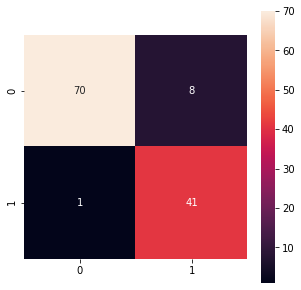

In [193]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, lin_da4.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("lin_da4_matrix.jpg")
plt.show()

## c) Naive Bayes

### Discrete variables

In [194]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

(400, 24)
(400,)


In [195]:
# Obtenemos X e Y
X = df[int_cols]
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


(400, 10)
(400,)


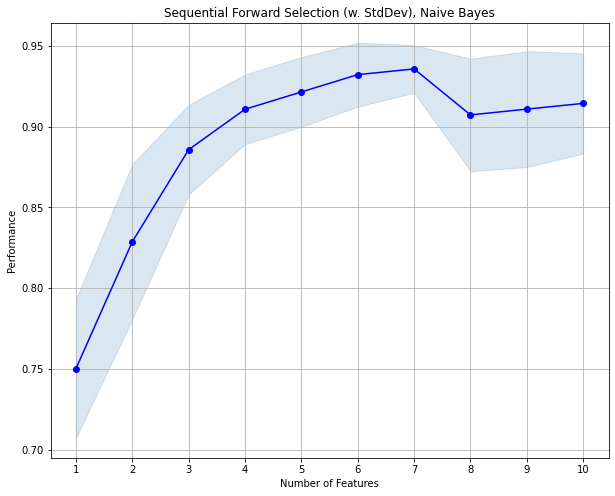

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.7021276595744681, 0.8064516129032258, 0.741...",0.750172,"(hypertension,)",0.096734,0.042986,0.030396
2,"(4, 5)","[0.776595744680851, 0.8924731182795699, 0.8172...",0.828758,"(hypertension, diabetes_mellitus)",0.108031,0.048007,0.033946
3,"(0, 4, 5)","[0.8617021276595744, 0.9247311827956989, 0.870...",0.8858,"(red_blood_cells, hypertension, diabetes_melli...",0.06253,0.027787,0.019648
4,"(0, 4, 5, 7)","[0.8829787234042553, 0.9354838709677419, 0.913...",0.910814,"(red_blood_cells, hypertension, diabetes_melli...",0.048498,0.021552,0.015239
5,"(0, 2, 4, 5, 7)","[0.8936170212765957, 0.946236559139785, 0.9247...",0.921528,"(red_blood_cells, pus_cell_clumps, hypertensio...",0.048609,0.021601,0.015274
6,"(0, 2, 4, 5, 7, 8)","[0.9042553191489362, 0.946236559139785, 0.9462...",0.932243,"(red_blood_cells, pus_cell_clumps, hypertensio...",0.044534,0.01979,0.013994
7,"(0, 2, 4, 5, 6, 7, 8)","[0.9148936170212766, 0.946236559139785, 0.9462...",0.935789,"(red_blood_cells, pus_cell_clumps, hypertensio...",0.033249,0.014775,0.010448
8,"(0, 2, 3, 4, 5, 6, 7, 8)","[0.8617021276595744, 0.946236559139785, 0.9139...",0.907306,"(red_blood_cells, pus_cell_clumps, bacteria, h...",0.078384,0.034832,0.02463
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8617021276595744, 0.946236559139785, 0.9247...",0.91089,"(red_blood_cells, pus_cell_clumps, bacteria, h...",0.080724,0.035872,0.025365
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8723404255319149, 0.946236559139785, 0.9247...",0.914436,"(red_blood_cells, pus_cell, pus_cell_clumps, b...",0.069836,0.031034,0.021944


In [196]:
sfs = SFS(NB_dis1, 
           k_features=10, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3,
         n_jobs=-1)

sfs = sfs.fit(X_train, Y_train)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
#plt.ylim([0.6, 0.8])
plt.title('Sequential Forward Selection (w. StdDev), Naive Bayes')
plt.grid()
plt.rcParams["figure.figsize"] = (10, 8)
plt.savefig('wrapper_NB.png')
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [197]:
X.iloc[:,[0, 2, 4, 5, 6, 7, 8]]

,red_blood_cells,pus_cell_clumps,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema
0,1,0,1,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,1,0,1,0
3,1,1,1,0,0,1,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
395,1,0,0,0,0,0,0
396,1,0,0,0,0,0,0
397,1,0,0,0,0,0,0
398,1,0,0,0,0,0,0


In [198]:
# Obtenemos X e Y
X = X.iloc[:,[0, 2, 4, 5, 6, 7, 8]]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 7)
(400,)


In [199]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [200]:
X_train.head()

,red_blood_cells,pus_cell_clumps,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema
112,0,0,0,0,0,0,0
209,1,0,0,0,0,0,0
294,1,0,0,0,0,0,0
307,1,0,0,0,0,0,0
345,1,0,0,0,0,0,0


In [201]:
from sklearn.naive_bayes import BernoulliNB 

#Create a svm Classifier
NB_dis4 = BernoulliNB()

#Train the model using the training sets
NB_dis4.fit(X_train, Y_train)

BernoulliNB()

In [202]:
NB_dis4_acc = accuracy_score(Y_test, NB_dis4.predict(X_test))

print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(Y_train, NB_dis4.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes is {NB_dis4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, NB_dis4.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, NB_dis4.predict(X_test))}")

Training Accuracy of Gaussian Naive Bayes is 0.9357142857142857
Test Accuracy of Gaussian Naive Bayes is 0.9333333333333333 

Confusion Matrix :- 
[[70  8]
 [ 0 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        78
           1       0.84      1.00      0.91        42

    accuracy                           0.93       120
   macro avg       0.92      0.95      0.93       120
weighted avg       0.94      0.93      0.93       120



[[70  8]
 [ 0 42]]


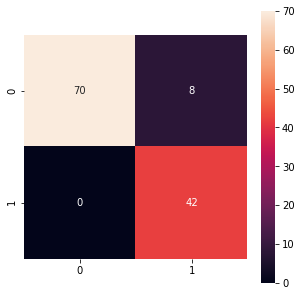

In [203]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, NB_dis4.predict(X_test))
print(matrix)

plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("NB_dis4_matrix.jpg")
plt.show()

## d) Metaclassifiers

### 1. Stacking

In [204]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(400, 24)
(400,)
(280, 24)
(120, 24)


<ipython-input-204-11ecb6757849>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-204-11ecb6757849>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

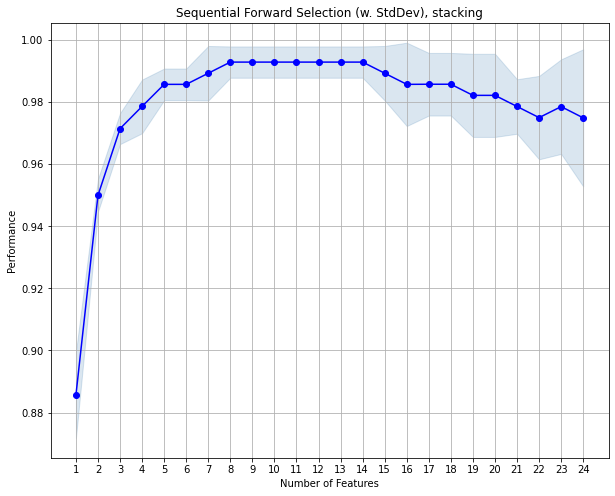

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.9042553191489362, 0.8709677419354839, 0.881...",0.885648,"(serum_creatinine,)",0.031213,0.01387,0.009808
2,"(2, 11)","[0.9574468085106383, 0.946236559139785, 0.9462...",0.949973,"(specific_gravity, serum_creatinine)",0.011892,0.005285,0.003737
3,"(2, 3, 11)","[0.9680851063829787, 0.967741935483871, 0.9784...",0.971441,"(specific_gravity, albumin, serum_creatinine)",0.011229,0.00499,0.003528
4,"(2, 3, 11, 21)","[0.9680851063829787, 0.978494623655914, 0.9892...",0.978609,"(specific_gravity, albumin, serum_creatinine, ...",0.019442,0.00864,0.006109
5,"(2, 3, 9, 11, 21)","[0.9893617021276596, 0.989247311827957, 0.9784...",0.985701,"(specific_gravity, albumin, blood_glucose_rand...",0.011468,0.005096,0.003603
6,"(0, 2, 3, 9, 11, 21)","[0.9893617021276596, 0.989247311827957, 0.9784...",0.985701,"(age, specific_gravity, albumin, blood_glucose...",0.011468,0.005096,0.003603
7,"(0, 2, 3, 5, 9, 11, 21)","[0.9893617021276596, 1.0, 0.978494623655914]",0.989285,"(age, specific_gravity, albumin, red_blood_cel...",0.019757,0.00878,0.006208
8,"(0, 2, 3, 5, 9, 11, 21, 22)","[0.9893617021276596, 1.0, 0.989247311827957]",0.99287,"(age, specific_gravity, albumin, red_blood_cel...",0.011346,0.005042,0.003565
9,"(0, 2, 3, 4, 5, 9, 11, 21, 22)","[0.9893617021276596, 1.0, 0.989247311827957]",0.99287,"(age, specific_gravity, albumin, sugar, red_bl...",0.011346,0.005042,0.003565
10,"(0, 2, 3, 4, 5, 8, 9, 11, 21, 22)","[0.9893617021276596, 1.0, 0.989247311827957]",0.99287,"(age, specific_gravity, albumin, sugar, red_bl...",0.011346,0.005042,0.003565


In [205]:
sfs = SFS(get_stacking(), 
           k_features=24, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3,
         n_jobs=-1)

sfs = sfs.fit(X_train, Y_train)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
#plt.ylim([0.6, 0.8])
plt.title('Sequential Forward Selection (w. StdDev), stacking')
plt.grid()
plt.rcParams["figure.figsize"] = (10, 8)
plt.savefig('wrapper_stacking.png')
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T


In [206]:
# Obtenemos X e Y
X = df.iloc[:,[0, 2, 3, 5, 9, 11, 21, 22]]
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])

print(X.shape)


(400, 8)
(400,)
(400, 8)


<ipython-input-206-af8d8a4ecb20>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[float_cols] = scaler.fit_transform(X[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


>lr 0.963 (0.031)
>knn 0.950 (0.037)
>cart 0.960 (0.035)
>svm 0.973 (0.029)
>stacking 0.979 (0.027)


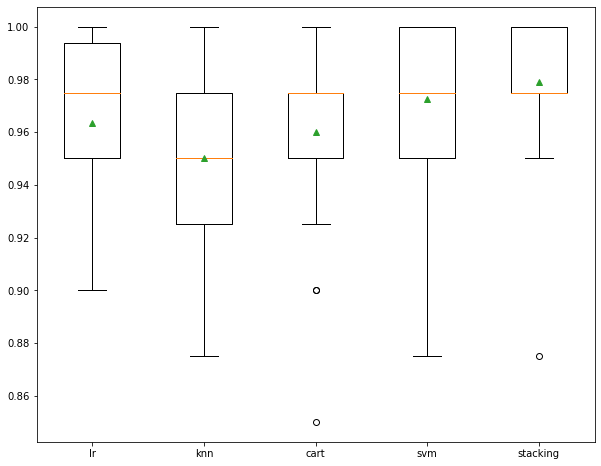

In [207]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# get a list of models to evaluate

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['stacking'] = get_stacking()
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    if name == 'stacking':
        stack4_acc = np.mean(scores)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [208]:
stack4_acc

0.9791666666666667

### 2) Bagging

In [209]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
print(X_train.shape)
print(X_test.shape)

(400, 24)
(400,)
(280, 24)
(120, 24)


<ipython-input-209-11ecb6757849>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-209-11ecb6757849>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

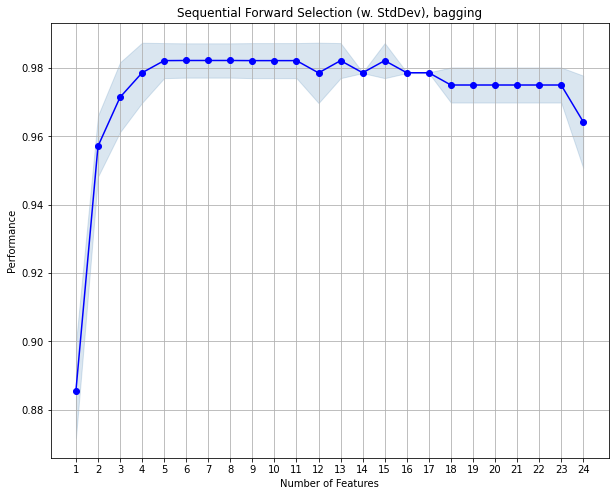

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.9042553191489362, 0.8709677419354839, 0.881...",0.885648,"(serum_creatinine,)",0.031213,0.01387,0.009808
2,"(2, 11)","[0.9680851063829787, 0.946236559139785, 0.9569...",0.957104,"(specific_gravity, serum_creatinine)",0.020073,0.00892,0.006307
3,"(2, 3, 11)","[0.9787234042553191, 0.978494623655914, 0.9569...",0.971402,"(specific_gravity, albumin, serum_creatinine)",0.022936,0.010192,0.007207
4,"(2, 3, 11, 12)","[0.9787234042553191, 0.989247311827957, 0.9677...",0.978571,"(specific_gravity, albumin, serum_creatinine, ...",0.019758,0.00878,0.006209
5,"(2, 3, 9, 11, 12)","[0.9893617021276596, 0.978494623655914, 0.9784...",0.982117,"(specific_gravity, albumin, blood_glucose_rand...",0.011528,0.005123,0.003622
6,"(2, 3, 9, 11, 12, 19)","[0.9787234042553191, 0.989247311827957, 0.9784...",0.982155,"(specific_gravity, albumin, blood_glucose_rand...",0.011287,0.005016,0.003547
7,"(2, 3, 4, 9, 11, 12, 19)","[0.9787234042553191, 0.989247311827957, 0.9784...",0.982155,"(specific_gravity, albumin, sugar, blood_gluco...",0.011287,0.005016,0.003547
8,"(2, 3, 4, 9, 11, 12, 19, 20)","[0.9787234042553191, 0.989247311827957, 0.9784...",0.982155,"(specific_gravity, albumin, sugar, blood_gluco...",0.011287,0.005016,0.003547
9,"(0, 2, 3, 4, 9, 11, 12, 19, 20)","[0.9893617021276596, 0.978494623655914, 0.9784...",0.982117,"(age, specific_gravity, albumin, sugar, blood_...",0.011528,0.005123,0.003622
10,"(0, 1, 2, 3, 4, 9, 11, 12, 19, 20)","[0.9893617021276596, 0.978494623655914, 0.9784...",0.982117,"(age, blood_pressure, specific_gravity, albumi...",0.011528,0.005123,0.003622


In [210]:

sfs = SFS(BaggingClassifier(n_estimators=1000), 
           k_features=24, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           n_jobs=-1,
           cv=3)

sfs = sfs.fit(X_train, Y_train)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
#plt.ylim([0.6, 0.8])
plt.title('Sequential Forward Selection (w. StdDev), bagging')
plt.grid()
plt.rcParams["figure.figsize"] = (10, 8)
plt.savefig('wrapper_bagging.png')
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [211]:
# Obtenemos X e Y
X = df.iloc[:,[2, 3, 9, 11, 12]]
Y = df['class']
print(X.shape)
print(Y.shape)

int_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.int))]
float_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.float))]

# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])

print(X.shape)


(400, 5)
(400,)
(400, 5)


<ipython-input-211-7d8a2f6c0214>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[float_cols] = scaler.fit_transform(X[float_cols])
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

>10 0.972 (0.026)
>50 0.977 (0.023)
>100 0.977 (0.024)
>500 0.978 (0.027)
>1000 0.978 (0.027)
>5000 0.978 (0.027)


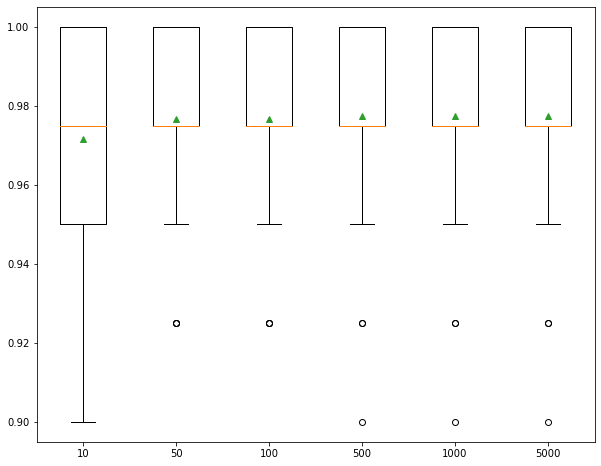

In [212]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, accuracies = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, Y)
    # store the results
    results.append(scores)
    names.append(name)
    accuracies.append(np.mean(scores))
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
bag4_acc = max(accuracies)
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 5. Models Comparison

In [215]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression with all original variables','Logistic Regression with a univariate filter feature subset selection',
               'Logistic Regression with a multivariate filter feature subset selection', 'Logistic Regression with a multivariate wrapper feature subset selection',
               'Discriminant Analysis with all original variables','Discriminant Analysis with a univariate filter feature subset selection',
               'Discriminant Analysis with a multivariate filter feature subset selection', 'Discriminant Analysis with a multivariate wrapper feature subset selection',
               'Naive Bayes with all original variables','Naive Bayes with a univariate filter feature subset selection',
               'Naive Bayes with a multivariate filter feature subset selection', 'Naive Bayes with a multivariate wrapper feature subset selection',
               'Stacking with all original variables','Stacking with a univariate filter feature subset selection',
               'Stacking with a multivariate filter feature subset selection', 'Stacking with a multivariate wrapper feature subset selection',
               'Bagging with all original variables','Bagging with a univariate filter feature subset selection',
               'Bagging with a multivariate filter feature subset selection', 'Bagging with a multivariate wrapper feature subset selection',
               'Random Forest with all original variables','Random Forest with a univariate filter feature subset selection',
               'Random Forest with a multivariate filter feature subset selection',
               'Gradient Boosting with all original variables','Gradient Boosting with a univariate filter feature subset selection',
               'Gradient Boosting with a multivariate filter feature subset selection'],
    'Score' : [log_reg1_acc, log_reg2_acc, log_reg3_acc, log_reg4_acc, lin_da1_acc, lin_da2_acc, lin_da3_acc, lin_da4_acc,
               NB_dis1_acc, NB_dis2_acc, NB_dis3_acc, NB_dis4_acc, stack1_acc, stack2_acc, stack3_acc, stack4_acc, 
               bag1_acc, bag2_acc, bag3_acc, bag4_acc, RF1_acc, RF3_acc, RF3_acc, GB1_acc, GB2_acc, GB3_acc]
})


models.sort_values(by = 'Score', ascending = False)



,Model,Score
20,Random Forest with all original variables,1.000000
24,Gradient Boosting with a univariate filter fea...,0.991667
0,Logistic Regression with all original variables,0.983333
23,Gradient Boosting with all original variables,0.983333
25,Gradient Boosting with a multivariate filter f...,0.983333
15,Stacking with a multivariate wrapper feature s...,0.979167
19,Bagging with a multivariate wrapper feature su...,0.977500
16,Bagging with all original variables,0.975000
12,Stacking with all original variables,0.975000
18,Bagging with a multivariate filter feature sub...,0.971667


In [216]:
models.to_csv('models.csv',index=False)

In [217]:
import plotly
import plotly.express as px
fig = px.bar(data_frame = models.sort_values(by = 'Score', ascending = True), x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')
plotly.offline.plot(fig, filename='models_comparison.html')


'models_comparison.html'